In [1]:
%matplotlib inline
from matplotlib import pyplot
import cv2
import json
import pandas as pd
import numpy as np 
from PIL import Image

In [2]:
import os
root_dir = '/Data/CASIA_web_face/'
df = pd.read_csv(os.path.join(root_dir, 'casiaFacesDataset256+.csv'))


In [3]:
# collect samples w.r.t. subject_id
subj2indices = {}
for i, subj in enumerate(df['subject_id']) :
    if subj not in subj2indices :
        subj2indices[subj] = []
    subj2indices[subj].append(i)

print(f"INFO: successfully found {len(subj2indices)} subjects")

INFO: successfully found 10575 subjects


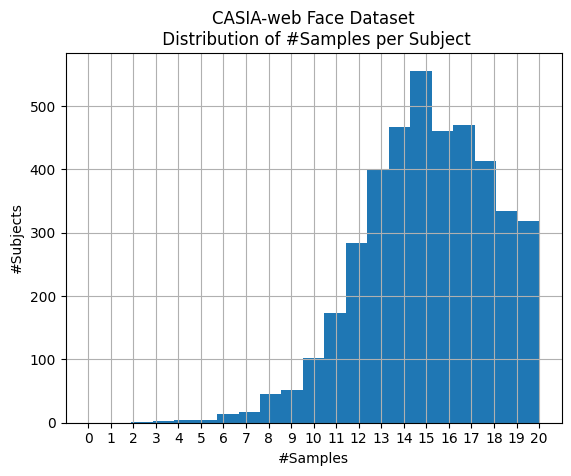

In [4]:
num_samples = [len(indices) for _, indices in subj2indices.items()]
_ = pyplot.hist(num_samples, bins=21, range=(0, 20))
pyplot.xlabel("#Samples")
pyplot.ylabel("#Subjects")
pyplot.title('CASIA-web Face Dataset\n Distribution of #Samples per Subject')
pyplot.grid(True)
_ = pyplot.xticks(range(21))

In [5]:
prng = np.random.RandomState(4321)
subj = prng.choice(list(subj2indices.keys()))
num_samples = 6

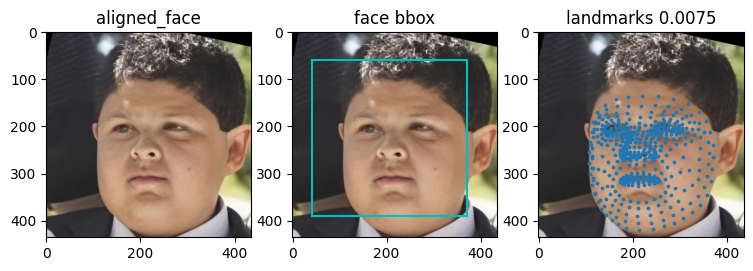

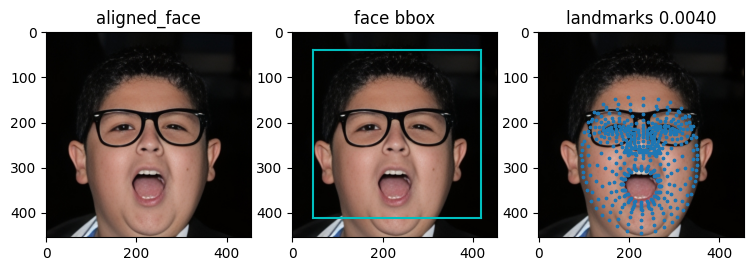

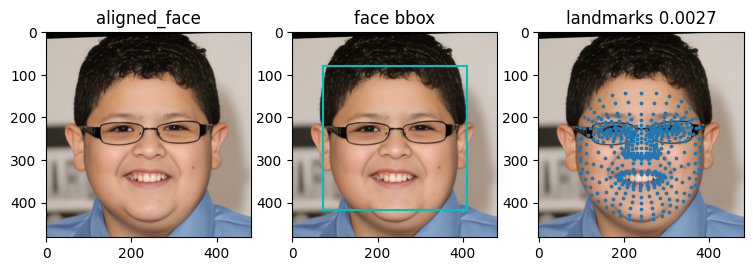

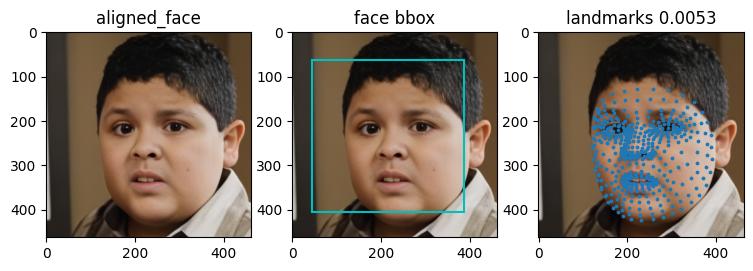

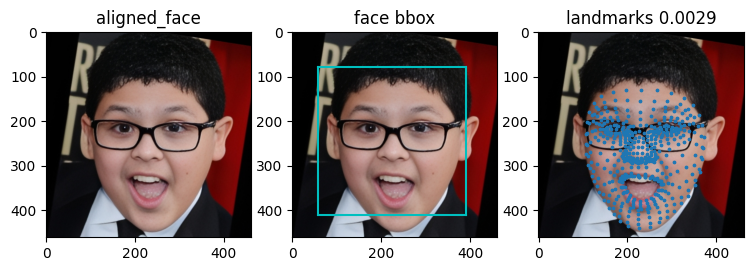

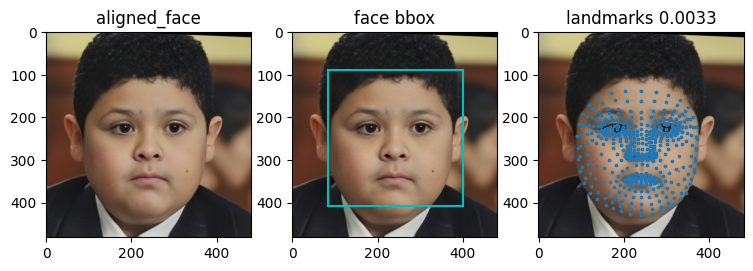

In [6]:
# 1. show face image + bbox + landmarks
def show_img_bbox_landmarks(sample) :
    # read face_file
    img = Image.open(os.path.join(root_dir, sample['face_file']))
    # read face bbox 
    bbox = json.loads(sample['bbox'])
    size = sample['aligned_size']
    # read landmarks
    landmarks = pd.read_csv(os.path.join(root_dir, sample['landmark_file']), header=None).to_numpy()
    uncertainty = sample['label_uncertainty']
    # denormalize bbox
    left, top, right, bottom = [v * size for v in bbox]
    landmarks *= size

    pyplot.figure(figsize=(3 * 3, 3))
    pyplot.subplot(1,3,1)
    pyplot.imshow(img)
    pyplot.title('aligned_face')

    pyplot.subplot(1,3,2)
    pyplot.imshow(img)
    pyplot.plot([left, left], [top, bottom], c='c')
    pyplot.plot([right, right], [top, bottom], c='c')
    pyplot.plot([left, right], [top, top], c='c')
    pyplot.plot([left, right], [bottom, bottom], c='c')
    pyplot.title('face bbox')

    pyplot.subplot(1,3,3)
    pyplot.imshow(img)
    pyplot.scatter(landmarks[:,0], landmarks[:,1], s=3)
    pyplot.title(f'landmarks {uncertainty:.4f}')
    pyplot.show()
    return

for i in subj2indices[subj][:num_samples] :
    sample= df.iloc[i]
    show_img_bbox_landmarks(sample)



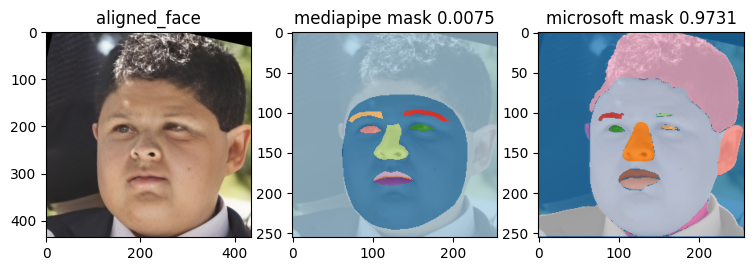

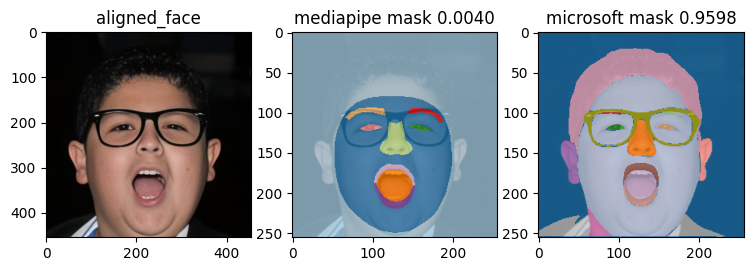

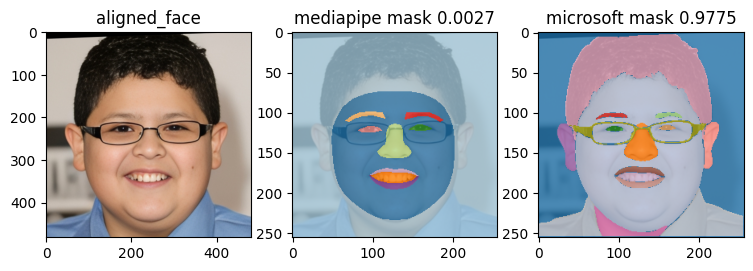

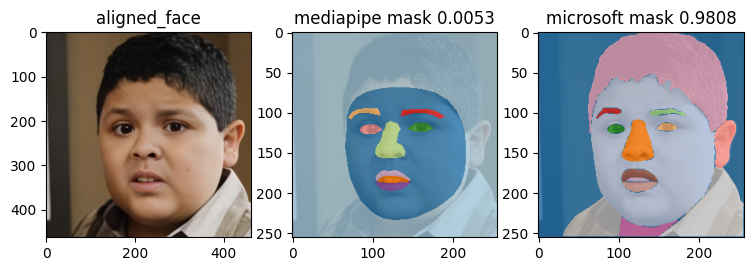

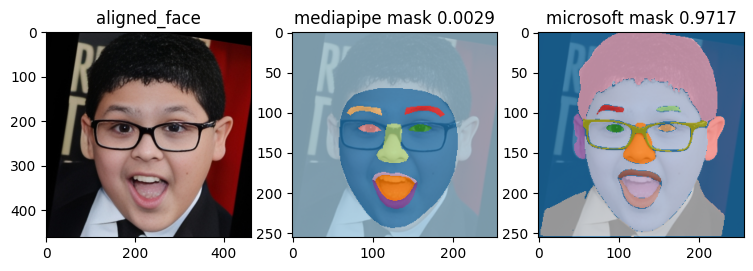

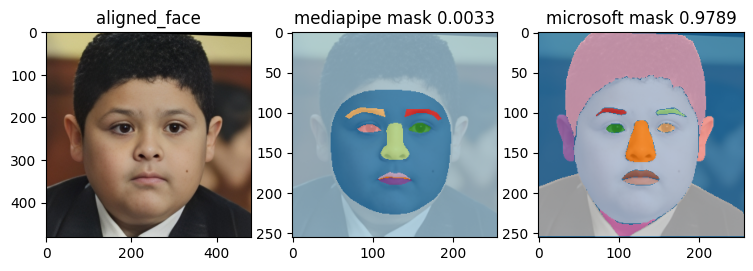

In [7]:
# 2. show face image + mask + msmask
def show_img_mask_msmask(sample) :
    # read face_file
    img = Image.open(os.path.join(root_dir, sample['face_file']))
    size = sample['annot_size']
    annot = img.resize((size, size))
    # read mask
    uncertainty = sample['label_uncertainty']
    mask = Image.open(os.path.join(root_dir, sample['mask_file']))
    # read msmask
    msmask = Image.open(os.path.join(root_dir, sample['msmask_file']))
    score = sample['msmask_score']

    pyplot.figure(figsize=(3 * 3, 3))
    pyplot.subplot(1,3,1)
    pyplot.imshow(img)
    pyplot.title('aligned_face')

    pyplot.subplot(1,3,2)
    pyplot.imshow(annot)
    pyplot.imshow(mask, alpha=0.75)
    pyplot.title(f'mediapipe mask {uncertainty:.4f}')

    pyplot.subplot(1,3,3)
    pyplot.imshow(annot)
    pyplot.imshow(msmask, alpha=0.75)
    pyplot.title(f'microsoft mask {score:.4f}')
    
    pyplot.show()
    return

for i in subj2indices[subj][:num_samples] :
    sample= df.iloc[i]
    show_img_mask_msmask(sample)



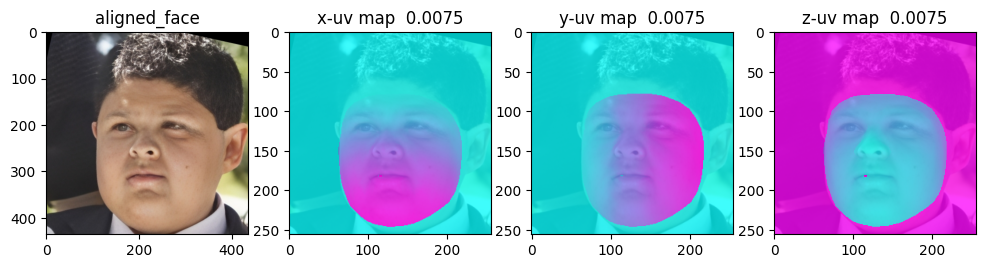

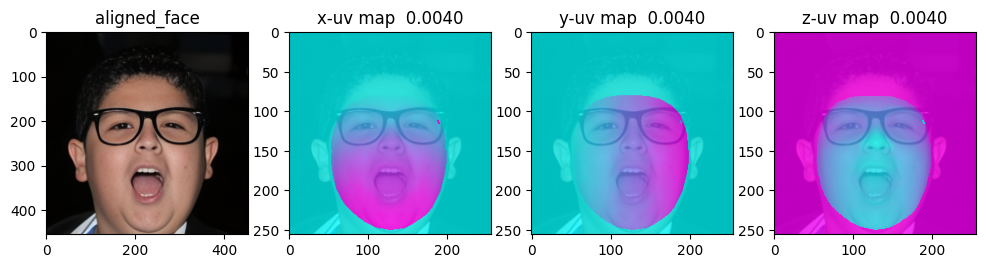

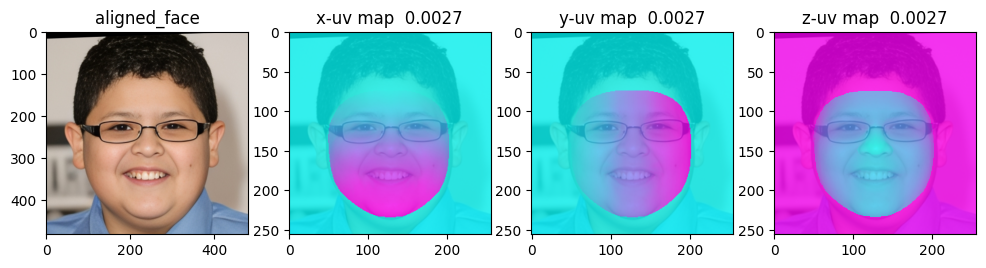

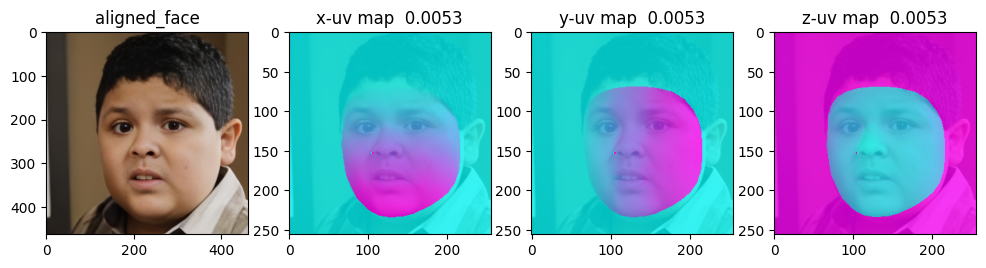

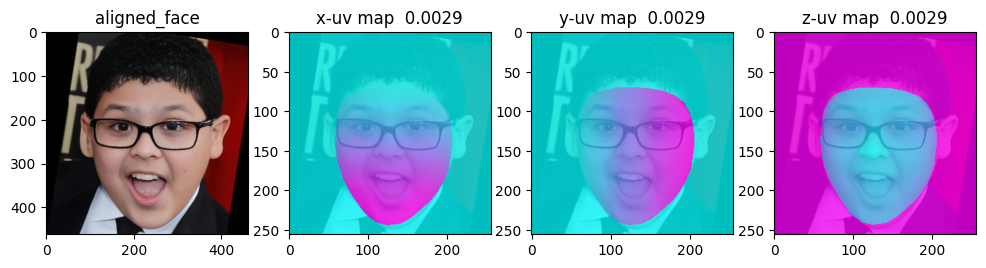

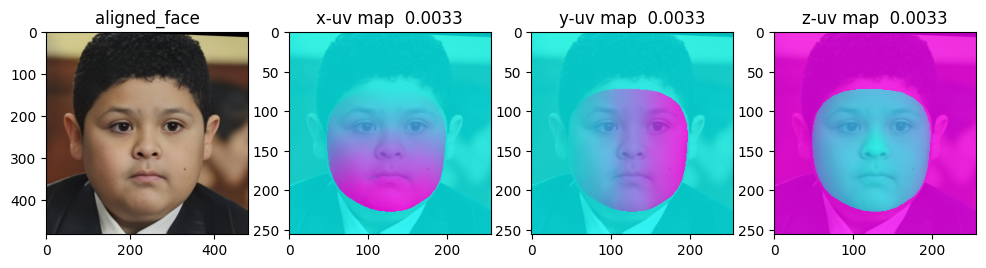

In [8]:
# 3. show face image + xyz maps
def show_img_xyzmaps(sample) :
    # read face_file
    img = Image.open(os.path.join(root_dir, sample['face_file']))
    size = sample['annot_size']
    annot = img.resize((size, size))
    # read mask
    uncertainty = sample['label_uncertainty']
    xyzmaps = np.load(os.path.join(root_dir, sample['xyz_file']))
    xmap, ymap, depth = np.split(xyzmaps, 3, axis=-1)
    dmin, dmax = json.loads(sample['depth_range'])

    pyplot.figure(figsize=(3 * 4, 3))
    pyplot.subplot(1,4,1)
    pyplot.imshow(img)
    pyplot.title('aligned_face')

    pyplot.subplot(1,4,2)
    pyplot.imshow(annot)
    pyplot.imshow(xmap, vmin=-1, vmax=62, cmap='cool', alpha=0.75)
    pyplot.title(f'x-uv map  {uncertainty:.4f}')

    pyplot.subplot(1,4,3)
    pyplot.imshow(annot)
    pyplot.imshow(ymap, vmin=-1, vmax=62, cmap='cool', alpha=0.75)
    pyplot.title(f'y-uv map  {uncertainty:.4f}')

    pyplot.subplot(1,4,4)
    pyplot.imshow(annot)
    pyplot.imshow(depth, vmin=dmin, vmax=dmax, cmap='cool', alpha=0.75)
    pyplot.title(f'z-uv map  {uncertainty:.4f}')
    
    pyplot.show()
    return

for i in subj2indices[subj][:num_samples] :
    sample= df.iloc[i]
    show_img_xyzmaps(sample)



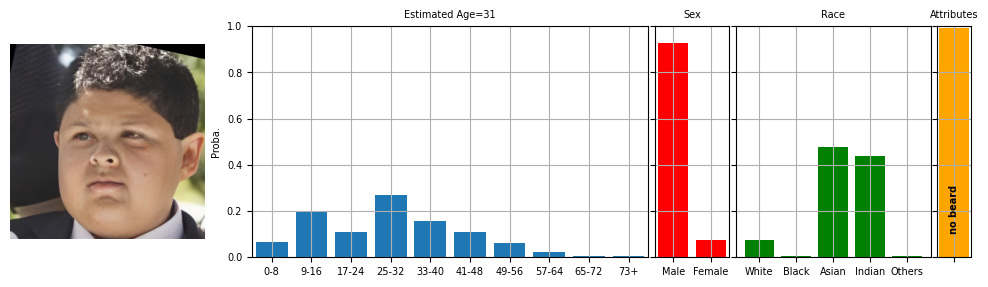

blip2-2.7b(0.2835): a young boy in a suit and tie looks to the side
git-large-coco(0.2768): a young boy wearing a suit and tie.
blip2-flan-t5-xl(0.2751): a young boy in a suit and tie
blip-large(0.2571): arafed boy in a suit and tie with a microphone
vit-gpt2(0.2418): a young man wearing a suit and tie
vit-swin(0.2353): A man in a suit and tie is looking at the camera.


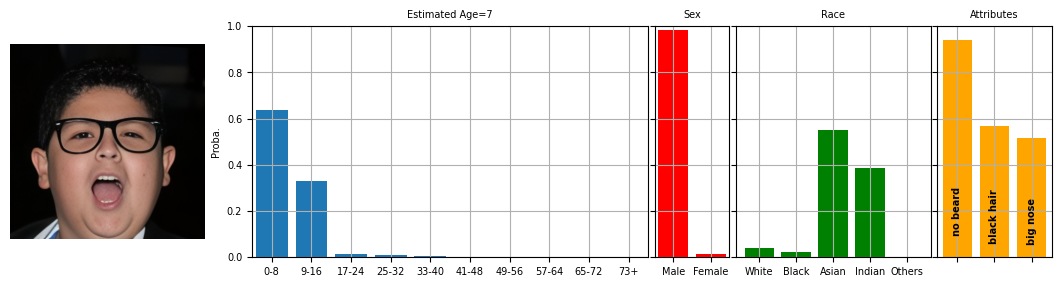

blip2-flan-t5-xl(0.3104): a boy in glasses with his mouth open
blip-large(0.3012): arafed boy in a suit and glasses making a funny face
git-large-coco(0.2966): a young boy wearing glasses and a suit jacket.
blip2-2.7b(0.2891): a young boy with glasses and a blue shirt
blip-base(0.2445): a man with glasses and a tie on
vit-swin(0.2415): A man with glasses and a tie is smiling.
vit-gpt2(0.2384): a man wearing glasses and a scarf


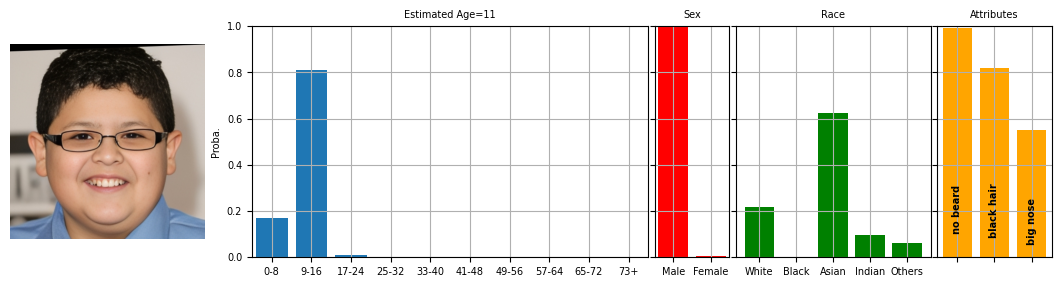

git-large-coco(0.3060): a young boy wearing glasses and a blue shirt.
blip2-2.7b(0.3017): a young boy wearing glasses and a blue shirt
blip2-flan-t5-xl(0.2991): a boy wearing glasses and a tie
blip-large(0.2968): smiling boy wearing glasses and a blue shirt and tie
blip-base(0.2949): a boy wearing glasses and a blue shirt
vit-swin(0.2733): A young man wearing glasses and a tie.
vit-gpt2(0.2732): a young man wearing glasses and a tie


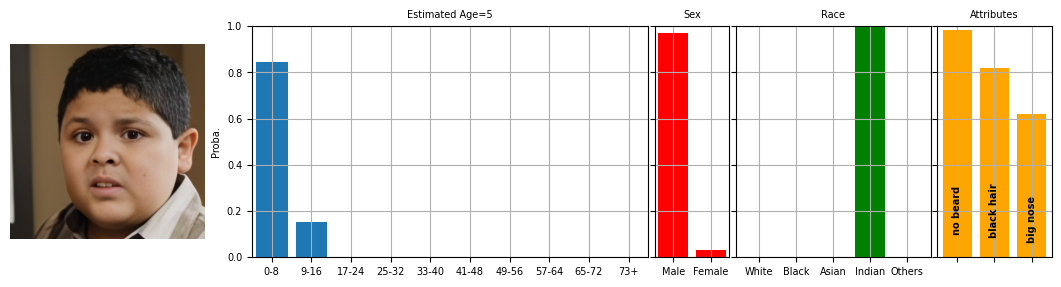

blip2-2.7b(0.2752): a young boy with a brown shirt on looks surprised
blip2-flan-t5-xl(0.2693): a boy in a brown shirt is staring at a picture
git-large-coco(0.2585): a young boy looks at the camera.
vit-swin(0.2353): A young boy is smiling and holding a cell phone.
blip-base(0.2275): a young boy is holding a remote control
blip-large(0.2201): there is a young boy that is holding a remote in his hand
vit-gpt2(0.2038): a young boy wearing a tie and smiling


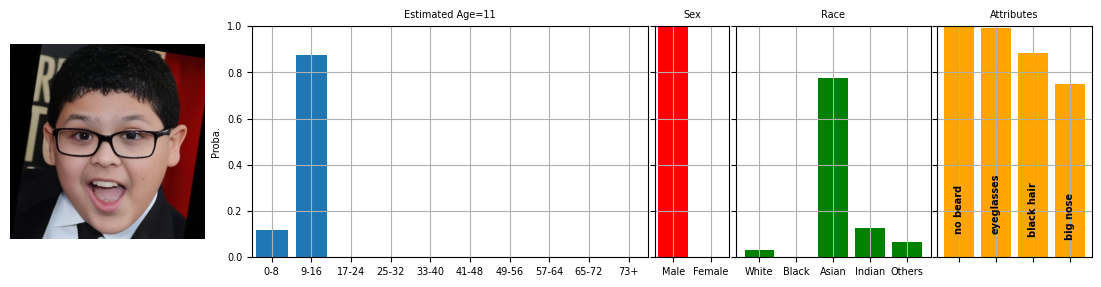

blip2-2.7b(0.3335): a young boy with glasses and a black suit
blip-base(0.3184): a young boy wearing glasses and a suit
blip2-flan-t5-xl(0.3168): a young boy in glasses and a suit is making a funny face
vit-swin(0.3072): A young boy wearing glasses and a tie.
blip-large(0.3049): there is a young boy wearing glasses and a suit and tie
git-large-coco(0.2284): [ unused0 ] is the most handsome boy in the world
vit-gpt2(0.2256): a man wearing a suit and tie


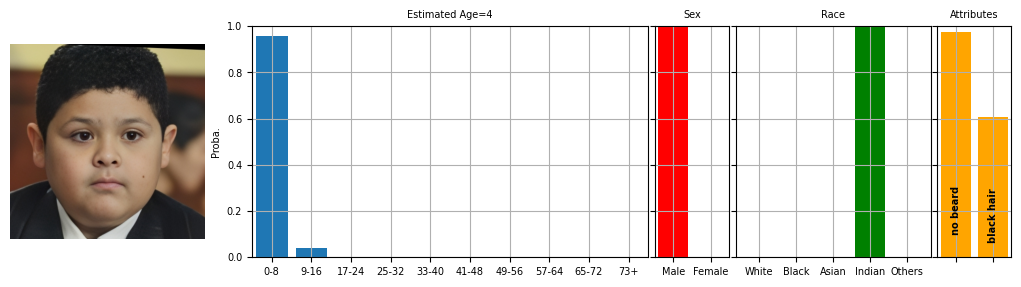

vit-gpt2(0.3100): a young boy wearing a suit and tie
blip2-2.7b(0.3095): a young boy in a suit and tie looking at the camera
git-large-coco(0.3040): a boy in a suit and tie looks at the camera.
vit-swin(0.3030): A young boy in a suit and tie.
blip2-flan-t5-xl(0.3013): a young boy in a suit and tie
blip-large(0.2946): there is a young boy wearing a suit and tie


In [9]:
def draw_attributes(img, res, 
                    img_title=None, 
                    figsize=(15,3),  
                    fontsize=7, 
                    output_file=None, 
                    thresh=0.5, topK=5) :
    from matplotlib import gridspec
    fig = pyplot.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, 29)
    ax = pyplot.subplot(gs[0,:5])
    ax.imshow(img)
    ax.axis('off')
    if img_title is not None :
        fig.suptitle(img_title)
    # plot age distribution
    age_proba = res['age_proba']
    age_est = res['age_estimated']
    xs = ['0-8', '9-16', '17-24', '25-32', '33-40', '41-48', '49-56', '57-64', '65-72','73+']
    ys = [age_proba[x] for x in xs]
    ax0 = pyplot.subplot(gs[0,6:16])
    ax0.bar(range(10), ys)
    ax0.set_xticks(range(10))
    ax0.set_xticklabels(xs)
    ax0.tick_params(labelsize=fontsize)
    ax0.set_ylim([0,1])
    ax0.set_xlim([-.5,9.5])
    ax0.grid()
    ax0.set_ylabel('Proba.', fontsize=fontsize)
    ax0.set_title('Estimated Age={:d}'.format(int(age_est)), fontsize=fontsize)
    # plot sex distribution
    sex_proba = res['sex_proba']
    xs = ['male', 'female']
    ys = [sex_proba[x] for x in xs]
    ax1 = pyplot.subplot(gs[0,16:18])
    ax1.bar(range(2), ys, color='r')
    ax1.set_ylim([0,1])
    ax1.set_xticks(range(2))
    ax1.set_xticklabels([x.capitalize() for x in xs] )
    ax1.tick_params(labelsize=fontsize)
    ax1.set_yticklabels([])
    ax1.grid()
    ax1.set_title('Sex', fontsize=fontsize)
    # plot race distribution
    race_proba = res['race_proba']
    xs = ['White', 'Black', 'Asian', 'Indian', 'Others(e.g. Hispanic, Latino, Arabic)']
    ys = [race_proba[x] for x in xs]
    ax2 = pyplot.subplot(gs[0,18:23])
    ax2.bar(range(5), ys, color='g')
    ax2.set_ylim([0,1])
    ax2.set_xticks(range(5))
    ax2.set_xticklabels([ x if 'Others' not in x else 'Others' for x in xs ] )
    ax2.tick_params(labelsize=fontsize)
    #ax2.yaxis.tick_right()
    ax2.set_yticklabels([])
    ax2.grid()
    ax2.set_title('Race', fontsize=fontsize)
    # plot positive attr
    attr_proba = dict(res['attr_proba'])
    if sex_proba['male'] > .5 :
        interested_keys = ['5_o_clock_shadow', 'bags_under_eyes', 
                     'bald', 'big_lips', 'big_nose', 'black_hair', 'blond_hair', 
                     'blurry', 'brown_hair',  'chubby', 'double_chin', 
                     'eyeglasses', 'goatee', 'gray_hair', 'mustache', 'narrow_eyes',
                     'no_beard', 'oval_face', 'pale_skin', 'pointy_nose', 'receding_hairline', 
                     'sideburns', 'wearing_hat']
    else :
        interested_keys = ['arched_eyebrows', 'attractive', 'bags_under_eyes', 
         'bangs', 'big_lips', 'big_nose', 'black_hair', 'blond_hair', 'blurry', 
          'brown_hair', 'bushy_eyebrows', 'chubby', 'double_chin', 'eyeglasses', 
          'gray_hair', 'heavy_makeup', 'high_cheekbones', 
          'narrow_eyes', 'oval_face', 'pale_skin', 'pointy_nose', 
          'receding_hairline', 'rosy_cheeks', 'straight_hair', 
          'wavy_hair', 'wearing_earrings', 'wearing_hat', 'wearing_lipstick', 
          'wearing_necklace', 'wearing_necktie']
    keys = interested_keys
    vals = np.array([attr_proba[k] for k in keys])
    inds = np.argsort(vals)[::-1]
    selected = [ i for i in inds[:17] if vals[i] > thresh ]
    L = len(selected) 
    if (L > 0) :
        L = min(L, topK)
        selected = selected[:L]
        ax3 = pyplot.subplot(gs[0,23:23+L])
        ff = ax3.bar(range(L), vals[selected], color='orange')
        ax3.set_xticks(range(L))
        ax3.set_yticklabels([])
        ax3.set_xticklabels([])
        #ax3.set_xticklabels([keys[s] for s in selected], fontsize=fontsize, rotation=45)
        for r, label in zip(ff, [keys[s] for s in selected]) :
            h = r.get_height()
            ax3.text(r.get_x() + r.get_width() / 2., h/10., label.replace('_',' '), ha="center", va="bottom", color="black", fontsize=fontsize, rotation=90, fontweight="bold")
        ax3.set_ylim([0,1])
        ax3.grid()
        ax3.set_title('Attributes', fontsize=fontsize)
    # save if needed
    if output_file is not None :
        fig.savefig(output_file, bbox_inches='tight')
        print("INFO: save result visualization to", output_file)
    else :
        pyplot.show()
    
# 3. show face image + attributes + captions
def show_img_attrs_captions(sample) :
    # read face_file
    img = Image.open(os.path.join(root_dir, sample['face_file']))
    size = sample['annot_size']
    # read attributes
    pred_attrs = json.load(open(os.path.join(root_dir, sample['attr_file'])))
    captions = json.load(open(os.path.join(root_dir, sample['caption_file'])))

    title, clip_scores = [], []
    for cap, lut in captions.items() :
        model = lut['model']
        score = lut['CLIP_score']
        clip_scores.append(score)
        title.append(f'{model}({score:.4f}): {cap}')
    indices = np.argsort(clip_scores)[::-1]
    title = '\n'.join([title[i] for i in indices])
    draw_attributes(img, pred_attrs, 
                    img_title=None,
                    figsize=(15, 3))
    print(title)


for i in subj2indices[subj][:num_samples] :
    sample= df.iloc[i]
    show_img_attrs_captions(sample)



In [10]:
def compute_cosine_scores(feats) :
    # normalize each row
    norms = np.linalg.norm(feats, axis=1, keepdims=True)
    normalized_feats = feats / norms

    # compute cosine similarity
    similarity = normalized_feats @ normalized_feats.T
    return similarity

feats, imgs = [], []
for i in subj2indices[subj][:num_samples] :
    sample= df.iloc[i]
    feat = json.load(open(os.path.join(root_dir, sample['feat_file'])))
    img = Image.open(os.path.join(root_dir, sample['face_file']))
    feats.append(feat)
    imgs.append(img)

feats = np.row_stack(feats)
simi_scores = compute_cosine_scores(feats)

                     

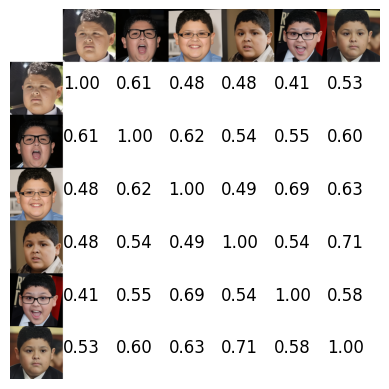

In [11]:
size = 200
blank = np.ones([size,size,3]).astype('uint8') * 255
rows = [np.column_stack([blank] + [t.resize((size,size)) for t in imgs])]
for i, t in enumerate(imgs) :
    rows.append(np.column_stack([t.resize((size,size))] + [blank] * num_samples))
pyplot.imshow(np.row_stack(rows))

for i in range(num_samples) :
    for j in range(num_samples) :
        x = (1+i) * size 
        y = (1+j) * size + size//2
        pyplot.annotate( '{:.2f}'.format(simi_scores[i,j]), (x, y), fontsize=12)
pyplot.axis('off')
pyplot.grid()